In [23]:

import scipy
import scipy.io
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt 
import pandas as pd
import math

In [24]:
mat_data = scipy.io.loadmat('isomap.mat')
image = mat_data['images']
data = mat_data['images']
data = data.T
#print(data.shape) #--> (698, 4096)
dist_matrix = np.zeros(shape=(698,698))

for i in range(698):
    for j in range(698):

        dist_matrix[i][j] = np.linalg.norm(data[i] - data[j])

dist_matrix

    


array([[ 0.        , 18.83094952,  6.74323967, ..., 21.51126745,
        22.79289298, 18.03618033],
       [18.83094952,  0.        , 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161,  0.        , ..., 22.82140093,
        23.24040786, 18.68417978],
       ...,
       [21.51126745, 15.07435566, 22.82140093, ...,  0.        ,
        23.3365749 , 17.19515048],
       [22.79289298, 21.63387369, 23.24040786, ..., 23.3365749 ,
         0.        , 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772,  0.        ]])

In [25]:
dist_eps = []
for i in range(698):
    d= np.copy(dist_matrix[i])

    d.sort()
    #print(d)
    dist_eps.append(d[101])
epsilon = np.max(dist_eps)
epsilon

22.41473526587973

In [26]:
data.shape

(698, 4096)

In [27]:
dist_matrix[dist_matrix > 22.41] = 0


adjacency_matrix = dist_matrix
print("Adjacency_matrix:")
display(adjacency_matrix)
adjacency_matrix.shape

Adjacency_matrix:


array([[ 0.        , 18.83094952,  6.74323967, ..., 21.51126745,
         0.        , 18.03618033],
       [18.83094952,  0.        , 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161,  0.        , ...,  0.        ,
         0.        , 18.68417978],
       ...,
       [21.51126745, 15.07435566,  0.        , ...,  0.        ,
         0.        , 17.19515048],
       [ 0.        , 21.63387369,  0.        , ...,  0.        ,
         0.        , 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772,  0.        ]])

(698, 698)

array([[0., 1., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

Sum each row in Adjacency matrix is 100
100.0


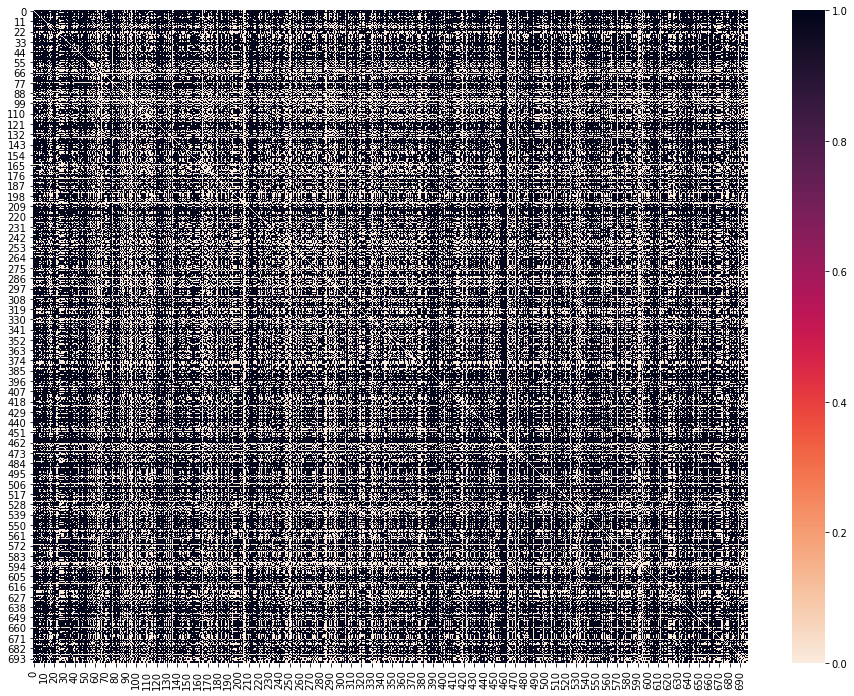

In [28]:
A_matrix = adjacency_matrix.copy()

A_matrix[A_matrix > 0] = 1


display(A_matrix)


print("Sum each row in Adjacency matrix is 100")
print(np.amin(np.sum(A_matrix,axis = 0)))

plt.figure(figsize=(16,12))

# visulize the adjancency_matrix as a heatmap
sea.heatmap(A_matrix, cmap="rocket_r")
plt.savefig('HW2_Q2_Adjacencymatricx.png')
plt.show()


<Figure size 1152x864 with 0 Axes>

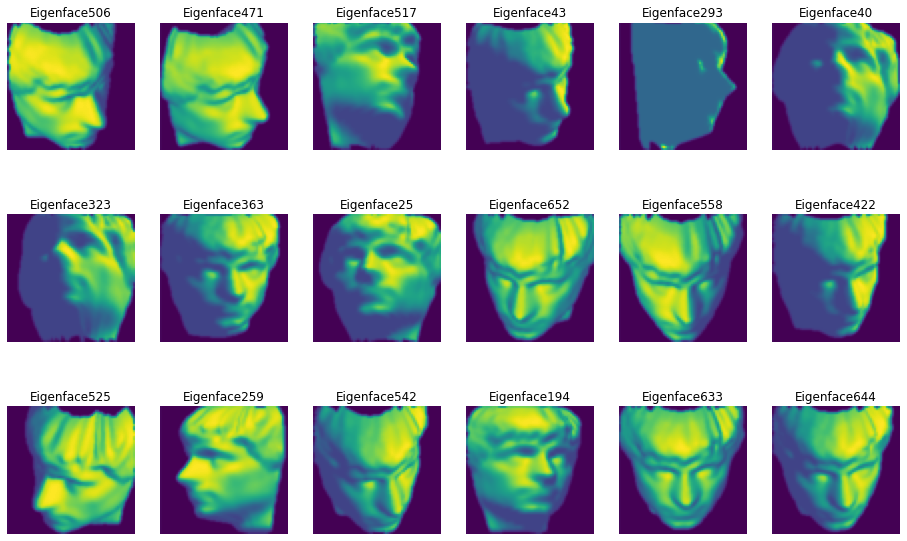

In [31]:
plt.figure(figsize=(16,12))

image_list= [506, 471, 517, 43, 293, 40, 323, 363, 25, 652, 558, 422, 525, 259, 542, 194, 633, 644]

plt.figure(figsize=(16,10))
for i in image_list:
        face_reshape = np.reshape(data[i,:], (64,64)).T # reshape the data to its original form
        plt.subplot(3,6,image_list.index(i)+1)
        plt.title('Eigenface'+str(i))
        plt.imshow(face_reshape)
        plt.axis('off')
plt.savefig('HW2_Q2_Similarity faces.png')

In [22]:

adjacency_matrix[adjacency_matrix==0] = 1000000
display(adjacency_matrix)

array([[1.00000000e+06, 1.88309495e+01, 6.74323967e+00, ...,
        2.15112675e+01, 1.00000000e+06, 1.80361803e+01],
       [1.88309495e+01, 1.00000000e+06, 1.95530716e+01, ...,
        1.50743557e+01, 2.16338737e+01, 2.09739975e+01],
       [6.74323967e+00, 1.95530716e+01, 1.00000000e+06, ...,
        1.00000000e+06, 1.00000000e+06, 1.86841798e+01],
       ...,
       [2.15112675e+01, 1.50743557e+01, 1.00000000e+06, ...,
        1.00000000e+06, 1.00000000e+06, 1.71951505e+01],
       [1.00000000e+06, 2.16338737e+01, 1.00000000e+06, ...,
        1.00000000e+06, 1.00000000e+06, 2.03135377e+01],
       [1.80361803e+01, 2.09739975e+01, 1.86841798e+01, ...,
        1.71951505e+01, 2.03135377e+01, 1.00000000e+06]])

In [8]:
import numpy as np
import networkx as nx


def Matrix_D(W):
    n = np.shape(W)[0]
    Graph = nx.DiGraph()
    for i in range(n):
        for j in range(n):
            Graph.add_weighted_edges_from([(i,j,min(W[i,j], W[j,i]))])

    res = dict(nx.all_pairs_dijkstra_path_length(Graph))
    D = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            D[i,j] = res[i][j]
    np.savetxt('D.csv', D)
    return D
D = Matrix_D(adjacency_matrix)

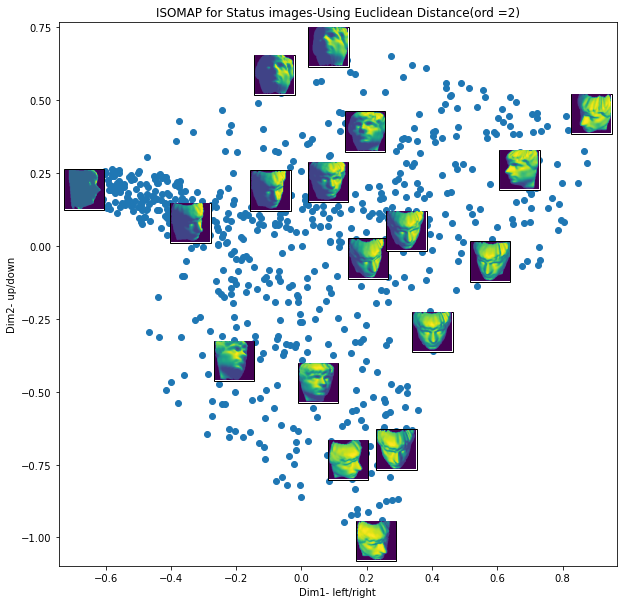

In [32]:
m = data.shape[0] 
I = np.identity(m) 
one_vector = np.ones((m,m)) 


H = I - (1/m)*one_vector 
C = (-1/(2*m))*((H.dot(np.square(D))).dot(H)) 

val, vec = np.linalg.eig(C)
idx = np.argsort(val)   
val = val[idx]
vec = vec[:,idx]
    
    
dim1 = vec[:,-1] * math.sqrt(val[-1])
dim2 = vec[:,-2] * math.sqrt(val[-2])

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.scatter(dim1, dim2)
plt.title('ISOMAP for Status images-Using Euclidean Distance(ord =2)')
plt.xlabel('Dim1- left/right')
plt.ylabel('Dim2- up/down')

selected_image_idx = [506, 471, 517, 43, 293, 40, 323, 363, 25, 652, 558, 422, 525, 259, 542, 194, 633, 644]
for i in selected_image_idx:
        single_image = np.reshape(data[i,:], (64,64)).T # reshape the data to its original form
        imagebox = OffsetImage(single_image, zoom=0.6)
        ab = AnnotationBbox(imagebox, (dim1[i],dim2[i]), pad=0.1)
        ax.add_artist(ab)
plt.savefig('HW2_Q2_ISOGRAPH_L2.png')
plt.show()

In [33]:
## Manhattan distance

In [34]:
from scipy.spatial.distance import cdist

dist_matrix_l1 = cdist(data, data, metric='cityblock')
#for i in range(698):
#    for j in range(698):
#        a= data[i]
#        b= data[j]

#        dist_matrix_l1[i][j] = np.sum(np.abs(a-b))

dist_matrix_l1


array([[   0.        ,  965.31026348,  257.36994485, ..., 1073.33045343,
        1083.13501838,  801.11789216],
       [ 965.31026348,    0.        ,  998.80539216, ...,  591.33363971,
        1041.83131127, 1054.478125  ],
       [ 257.36994485,  998.80539216,    0.        , ..., 1152.43014706,
        1123.03106618,  854.53792892],
       ...,
       [1073.33045343,  591.33363971, 1152.43014706, ...,    0.        ,
        1070.02515319,  736.96179534],
       [1083.13501838, 1041.83131127, 1123.03106618, ..., 1070.02515319,
           0.        ,  906.32530637],
       [ 801.11789216, 1054.478125  ,  854.53792892, ...,  736.96179534,
         906.32530637,    0.        ]])

In [35]:
dist_eps_l1 = []
for i in range(698):
    d_l1= np.copy(dist_matrix_l1[i])

    d_l1.sort()
    #print(d)
    dist_eps_l1.append(d_l1[101])
epsilon_l1 = np.max(dist_eps_l1)
epsilon_l1

1011.0060661764716

In [36]:
dist_matrix_l1[dist_matrix_l1 > 1011] = 0


adjacency_matrix_l1 = dist_matrix_l1
print("Adjacency_matrix for Manhattan distance:")
display(adjacency_matrix_l1)
adjacency_matrix_l1.shape

Adjacency_matrix for Manhattan distance:


array([[  0.        , 965.31026348, 257.36994485, ...,   0.        ,
          0.        , 801.11789216],
       [965.31026348,   0.        , 998.80539216, ..., 591.33363971,
          0.        ,   0.        ],
       [257.36994485, 998.80539216,   0.        , ...,   0.        ,
          0.        , 854.53792892],
       ...,
       [  0.        , 591.33363971,   0.        , ...,   0.        ,
          0.        , 736.96179534],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 906.32530637],
       [801.11789216,   0.        , 854.53792892, ..., 736.96179534,
        906.32530637,   0.        ]])

(698, 698)

array([[0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.]])

Sum each row in Adjacency matrix is 100
100.0


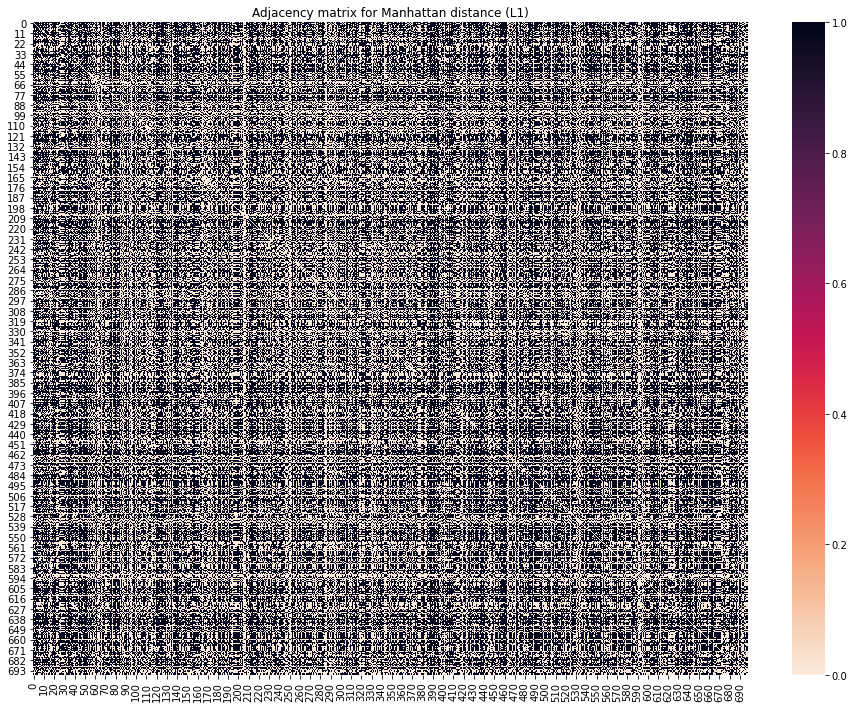

In [37]:
A_matrix_l1 = adjacency_matrix_l1.copy()

A_matrix_l1[A_matrix_l1 > 0] = 1


display(A_matrix_l1)


print("Sum each row in Adjacency matrix is 100")
print(np.amin(np.sum(A_matrix_l1,axis = 0)))

plt.figure(figsize=(16,12))

# visulize the adjancency_matrix as a heatmap
sea.heatmap(A_matrix_l1, cmap="rocket_r")
plt.title('Adjacency matrix for Manhattan distance (L1)')
plt.savefig('HW2_Q2_Adjacencymatricx_l1.png')
plt.show()

In [38]:
adjacency_matrix_l1[adjacency_matrix_l1==0] = 1000000
display(adjacency_matrix_l1)

array([[1.00000000e+06, 9.65310263e+02, 2.57369945e+02, ...,
        1.00000000e+06, 1.00000000e+06, 8.01117892e+02],
       [9.65310263e+02, 1.00000000e+06, 9.98805392e+02, ...,
        5.91333640e+02, 1.00000000e+06, 1.00000000e+06],
       [2.57369945e+02, 9.98805392e+02, 1.00000000e+06, ...,
        1.00000000e+06, 1.00000000e+06, 8.54537929e+02],
       ...,
       [1.00000000e+06, 5.91333640e+02, 1.00000000e+06, ...,
        1.00000000e+06, 1.00000000e+06, 7.36961795e+02],
       [1.00000000e+06, 1.00000000e+06, 1.00000000e+06, ...,
        1.00000000e+06, 1.00000000e+06, 9.06325306e+02],
       [8.01117892e+02, 1.00000000e+06, 8.54537929e+02, ...,
        7.36961795e+02, 9.06325306e+02, 1.00000000e+06]])

In [39]:
D_l1 = Matrix_D(adjacency_matrix_l1)


In [40]:
D_l1.shape

(698, 698)

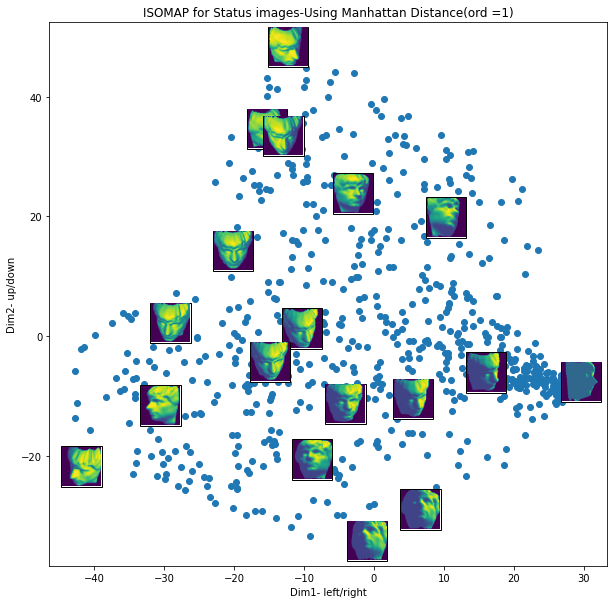

In [43]:
m = data.shape[0] 
I = np.identity(m) 
one_vector = np.ones((m,m)) 


H = I - (1/m)*one_vector 
C_l1 = (-1/(2*m))*((H.dot(np.square(D_l1))).dot(H)) 

val_l1, vec_l1 = np.linalg.eig(C_l1)
val_l1 = np.abs(val_l1)

idx_l1 = np.argsort(val_l1)   
val_l1 = val_l1[idx_l1]
vec_l1 = vec_l1[:,idx_l1]
    
    
dim1_l1 = vec_l1[:,-1] * math.sqrt(val_l1[-1])
dim2_l1 = vec_l1[:,-2] * math.sqrt(val_l1[-2])

#from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.scatter(dim1_l1, dim2_l1)
plt.title('ISOMAP for Status images-Using Manhattan Distance(ord =1)')
plt.xlabel('Dim1- left/right')
plt.ylabel('Dim2- up/down')

selected_image_idx = [506, 471, 517, 43, 293, 40, 323, 363, 25, 652, 558, 422, 525, 259, 542, 194, 633, 644]
for i in selected_image_idx:
        single_image = np.reshape(data[i,:], (64,64)).T # reshape the data to its original form
        imagebox = OffsetImage(single_image, zoom=0.6)
        ab = AnnotationBbox(imagebox, (dim1_l1[i],dim2_l1[i]), pad=0.1)
        ax.add_artist(ab)
plt.savefig('HW2_Q2_ISOGRAPH_L1.png')
plt.show()

In [44]:
data.shape

(698, 4096)

C:\Users\rebec\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\rebec\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


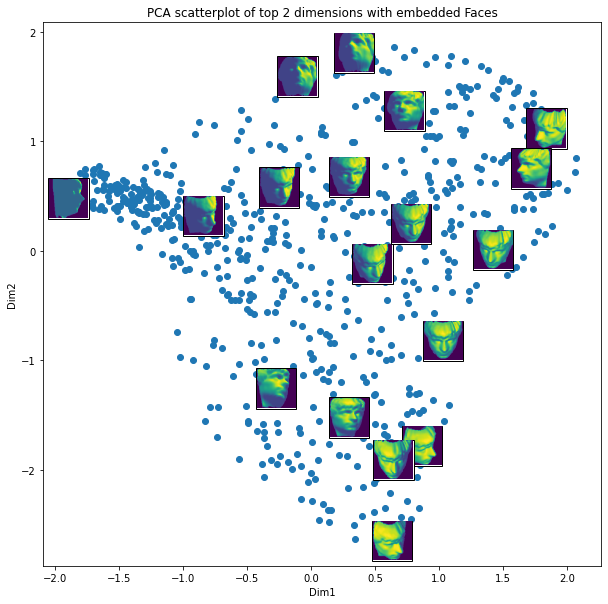

In [48]:
X = data.T
C_new = np.cov(X)
mu = np.mean(X,axis = 1)
xc = X - mu[:,None]

K = 2
eigen_values, eigen_vectors = np.linalg.eig(C_new)



projection_matrix = (eigen_vectors.T[:][:2]).T



X_pca = xc.T.dot(projection_matrix)


K=2
x=range(698)


dim1_pca = np.dot(projection_matrix[:,0].T,xc)/math.sqrt(eigen_values[0])
dim2_pca = np.dot(projection_matrix[:,1].T,xc)/math.sqrt(eigen_values[1])

dim1_pca = dim1_pca.real
dim2_pca = dim2_pca.real


fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.scatter(dim1_pca, dim2_pca)

selected_image_idx = [506, 471, 517, 43, 293, 40, 323, 363, 25, 652, 558, 422, 525, 259, 542, 194, 633, 644]
for i in selected_image_idx:
        single_image = np.reshape(data[i,:], (64,64)).T # reshape the data to its original form
        imagebox = OffsetImage(single_image, zoom=0.6)
        ab = AnnotationBbox(imagebox, (dim1_pca[i],dim2_pca[i]), pad=0.1)
        ax.add_artist(ab)
plt.title('PCA scatterplot of top 2 dimensions with embedded Faces')
plt.xlabel('Dim1')
plt.ylabel('Dim2')

plt.savefig('HW2_Q2_PCA.png')
plt.show()